# Code for Section 6.3 Risk Budgeting and Tracking Error Constraints
The example below illustrates how the volatility overshoot graphs have been computed with and without using Entropy Pooling.

In [1]:
import numpy as np
import fortitudo.tech as ft
import matplotlib.pyplot as plt

In [2]:
# Volatility decomposition function
def volatility_decomposition(benchmark_vol: float, te_vol: float, corr: float) -> float:
    return np.sqrt(benchmark_vol**2 + te_vol**2 + 2*benchmark_vol*te_vol*corr)

In [3]:
# Graph parameters
bm_vol = 0.10
te_est = 0.02
te_actual = np.array([te_est, 0.025, 0.03, 0.04, 0.05])
corrs = np.array([0, 0.25, 0.5, 0.75])

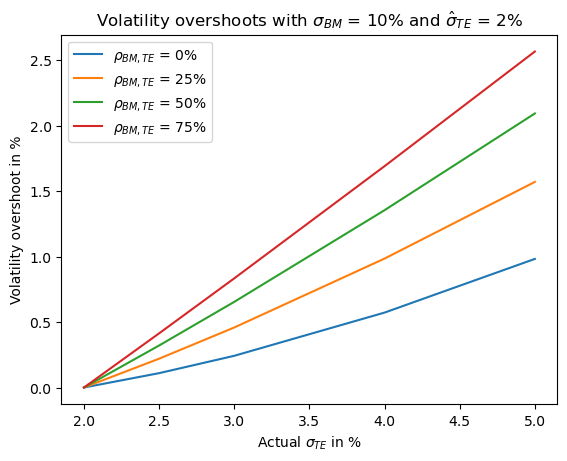

In [4]:
# Generate Figure 6.3.1
for corr in corrs:
    vol_estimate = volatility_decomposition(bm_vol, te_est, corr)
    vol_actual = np.full(te_actual.shape, np.nan)
    for i, te in enumerate(te_actual):
        vol_actual[i] = volatility_decomposition(bm_vol, te, corr)
    vol_overshoots = vol_actual - vol_estimate
    plt.plot(100 * te_actual, 100 * vol_overshoots)

plt.title(r'Volatility overshoots with $\sigma_{BM}$'
          + f' = {int(100 * bm_vol)}% and ' 
          + r'$\hat{\sigma}_{TE}$ = ' + f'{int(100 * te_est)}%')
plt.xlabel(r'Actual $\sigma_{TE}$ in %')
plt.ylabel('Volatility overshoot in %')
plt.legend([r'$\rho_{BM, TE}$ = ' + f'{int(100 * corr)}%' for corr in corrs])
plt.show()

# Including Entropy Pooling predictions

In [5]:
np.random.seed(1)
S = 10000
p = np.ones((S, 1)) / S

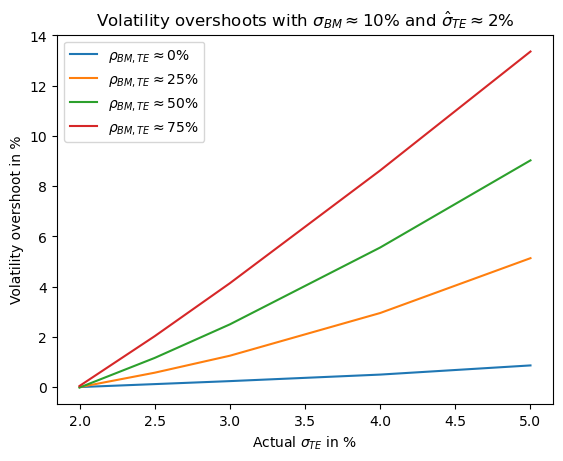

In [6]:
# Generate Figure 6.3.2
for corr in corrs:
    cov = np.array([[bm_vol**2, bm_vol*te_est*corr], [bm_vol*te_est*corr, te_est**2]])
    R = np.random.multivariate_normal(np.zeros(2), cov, S)
    vol_estimate = ft.portfolio_vol(np.array([[1.], [1.]]), R)
    vol_actual = np.full(te_actual.shape, np.nan)
    A = np.ones((1, S))
    A = np.vstack((A, R[:, 1]))
    A = np.vstack((A, (R[:, 1] - np.mean(R[:, 1]))**2))
    b = np.array([[1.], [np.mean(R[:, 1])], [te_est**2]])
    for i, te in enumerate(te_actual):
        b[-1] = te**2
        q = ft.entropy_pooling(p, A, b)
        vol_actual[i] = ft.portfolio_vol(np.array([[1.], [1.]]), R, q)
    vol_overshoots = vol_actual - vol_estimate
    plt.plot(100 * te_actual, 100 * vol_overshoots)

plt.title(r'Volatility overshoots with $\sigma_{BM} \approx$'
          + f'{int(100 * bm_vol)}% and ' 
          + r'$\hat{\sigma}_{TE} \approx$' + f'{int(100 * te_est)}%')
plt.xlabel(r'Actual $\sigma_{TE}$ in %')
plt.ylabel('Volatility overshoot in %')
plt.legend([r'$\rho_{BM, TE} \approx$' + f'{int(100 * corr)}%' for corr in corrs])
plt.show()